In [21]:
#importing libraries

import pandas as pd
# from sklearn.datasets import load_boston
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm
%matplotlib inline
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [118]:
df = pd.read_csv(r"../data/BostonHousing.csv") # r means raw string
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [119]:
from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/283692067" width="800" height="600" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>'
)

C:\Users\Shaikh\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [120]:
X = df.drop("medv",axis=1)   #Feature Matrix or Predictor DataFrame
y = df["medv"]          #Target Variable
X.shape

(506, 13)

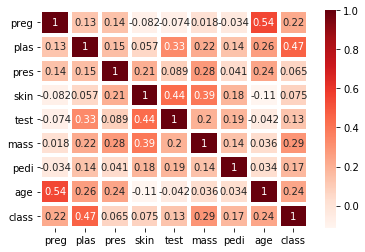

In [31]:
corr_ = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_, annot= True, cmap= plt.cm.Reds, linewidths = 3)
plt.show()

In [122]:
corr_.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [123]:
print(corr_['medv'])

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64


In [124]:
# Getting the Top 5 Features using Correalation of each feature with Target medv
import numpy as np
list_ = pd.Series(corr_['medv'])
list_ = abs(list_)
list_
list_.sort_values(ascending= False).index[1:6]


Index(['lstat', 'rm', 'ptratio', 'indus', 'tax'], dtype='object')

In [128]:
# Now retaining the top 5 Features 
# X = X[['lstat','rm', 'ptratio', 'indus', 'tax']]
X.head()

,lstat,rm,ptratio,indus,tax
0,4.98,6.575,15.3,2.31,296
1,9.14,6.421,17.8,7.07,242
2,4.03,7.185,17.8,7.07,242
3,2.94,6.998,18.7,2.18,222
4,5.33,7.147,18.7,2.18,222


In [23]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
X = df.drop('class',axis =1)
y = df['class']
X.shape

(768, 8)

In [26]:
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X,y) 
fit.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [27]:
X.shape

(768, 8)

In [22]:
fit.pvalues_

array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
       0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041])

In [ ]:
features = fit.transform(X)